In [2]:
import os
import numpy as np
import elephant
import matplotlib.pyplot as plt
%matplotlib inline

import validation_functions as vf

/Users/astasik/anaconda3/envs/py27/lib/python2.7/site-packages/elephant/spade.py:82: UserWarning: fim.so not found in elephant/spade_src folder,you are using the python implementation of fast fca
  'you are using the python implementation of fast fca')


In [3]:
def ProcessData(dataInput):
    data = np.array([])
    for i, d in enumerate(dataInput):
        data = np.append(data, d.magnitude)
    bins = np.arange(0., 200., .2)
    rate = np.histogram(data, bins=bins, density=True)[0]
    return rate

In [4]:
f = 'data'
DataFiles = ['data1.npy', 'data2.npy', 'data3.npy', 'data6.npy']
os.path.join(f, DataFiles[0])
# DataPath = [os.path.join(f, d) for d in DataFiles]
data = [np.load(os.path.join(f, d)) for d in DataFiles]

In [5]:
exc = ProcessData(vf.filter_data(data[0], neuron_type='exc'))
inh = ProcessData(vf.filter_data(data[0], neuron_type='inh'))
ratio = inh/exc

state_start_RS = data[0][1].annotations['behav.segm.']['RS'][:,0] *5
state_start_M = data[0][1].annotations['behav.segm.']['M'][:,0] * 5

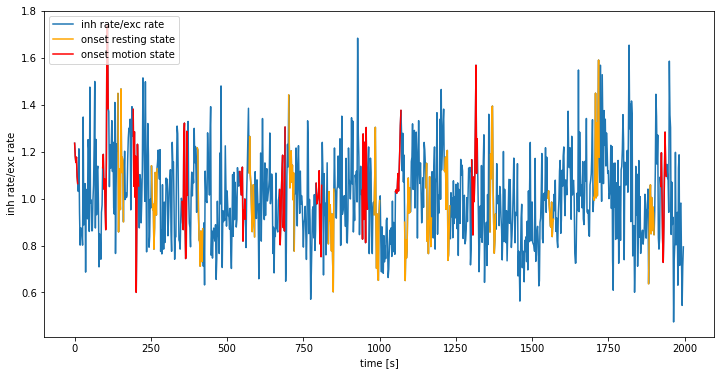

In [15]:
t = np.arange(len(ratio))

window_size = 5

plt.figure(figsize=(12,6))
plt.plot(2*t, ratio, label='inh rate/exc rate')
i=0
for t_change in state_start_RS:
    mask = np.logical_and(t>(t_change-window_size), t<=(t_change+window_size))
    if i==0:
        plt.plot(2*t[mask], ratio[mask], color='orange', label='onset resting state')
        i=1
    else:
        plt.plot(2*t[mask], ratio[mask], color='orange')
for t_change in state_start_M:
    mask = np.logical_and(t>(t_change-window_size), t<=(t_change+window_size))
    if i==1:
        plt.plot(2*t[mask], ratio[mask], color='red', label='onset motion state')
        i=2
    else:
        plt.plot(2*t[mask], ratio[mask], color='red')
    

plt.ylabel('inh rate/exc rate')   
plt.xlabel('time [s]')
plt.legend(loc='upper left')
plt.show()